# This notebook loads pre-trained Prophet models for weather variables, predicts the next 48 hours, plots forecasts, and creates a DataFrame with forecasted values for temperature, humidity, and other factors.

In [16]:
import os
import pickle

models_folder = 'models'

variables = ['temp_2', 'hum_2', 'temp_a', 'precip', 'rain', 'press', 'cloud', 'w_speed', 'w_dir']

loaded_models = {}
for variable in variables:
    file_path = os.path.join(models_folder, f'{variable}_prophet_model.pkl')
    with open(file_path, 'rb') as f:
        loaded_models[variable] = pickle.load(f)

In [17]:
import pandas as pd

start_date = '2024-01-01'
forecast_periods = 48

future_df = pd.DataFrame({'ds': pd.date_range(start=start_date, periods=forecast_periods, freq='H')})

forecast_data = {}
for variable, model in loaded_models.items():
    forecast_data[variable] = model.predict(future_df)

/var/folders/v5/bkbxnbb11yb0bkx8fmn5nw540000gn/T/ipykernel_28056/3782056114.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_df = pd.DataFrame({'ds': pd.date_range(start=start_date, periods=forecast_periods, freq='H')})


/Users/denystsebulya/weather-forecast-algorithm/venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/denystsebulya/weather-forecast-algorithm/venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


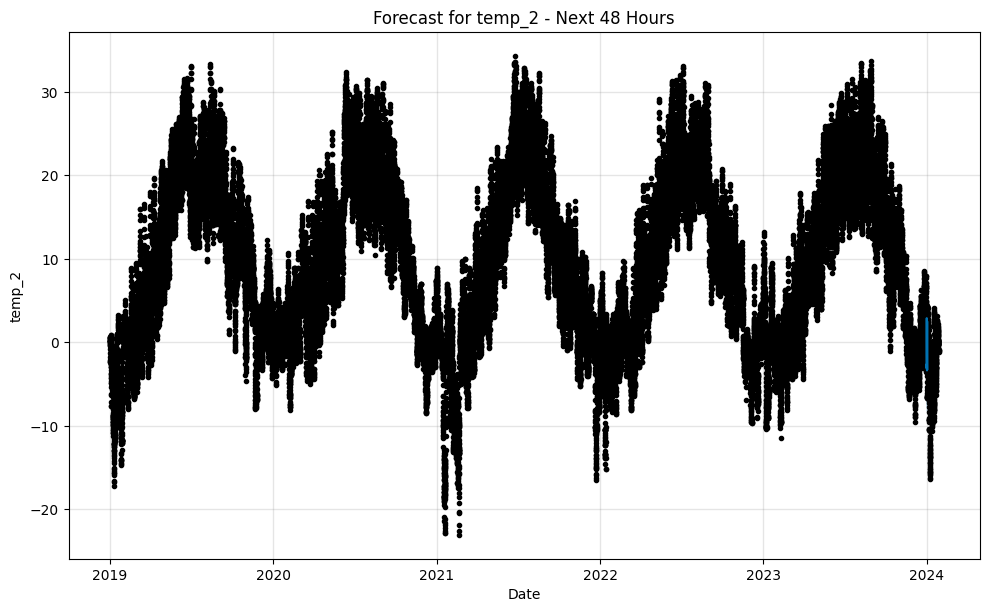

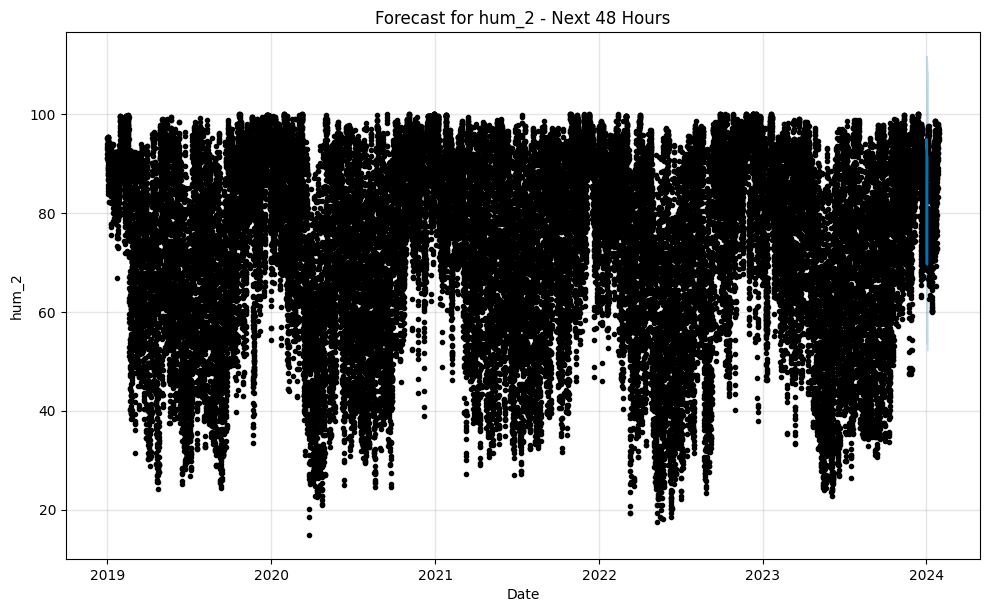

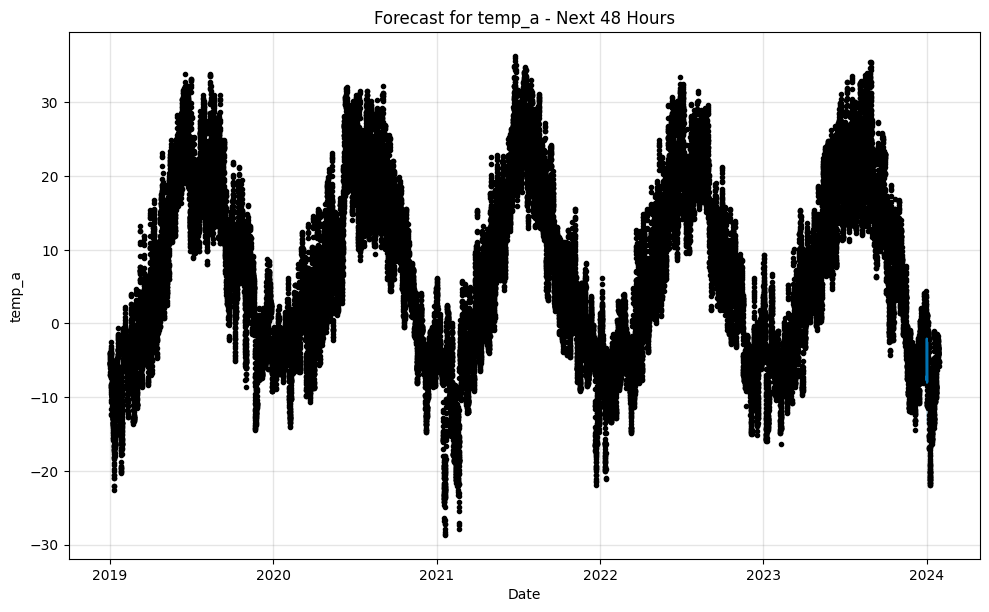

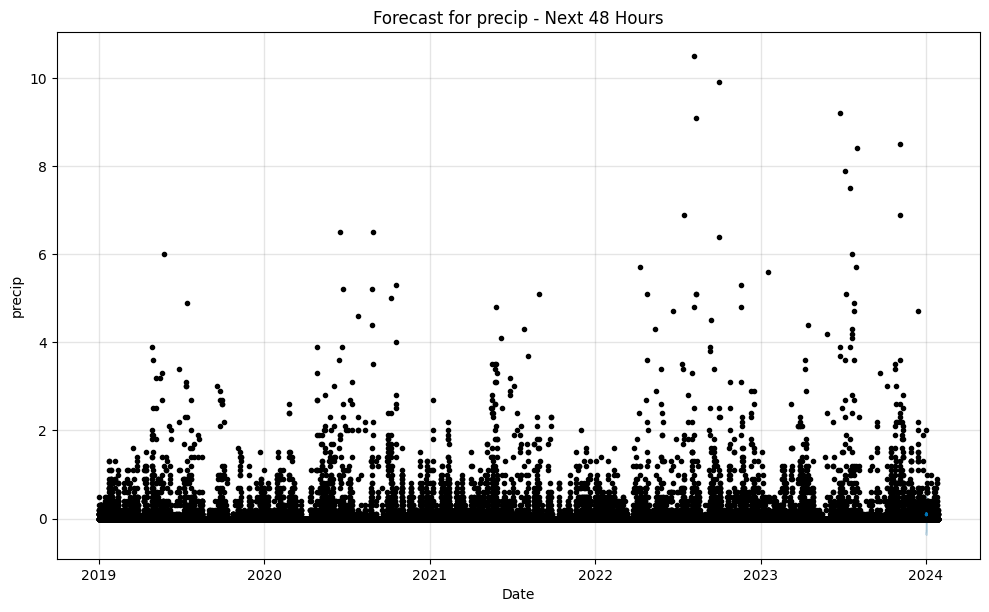

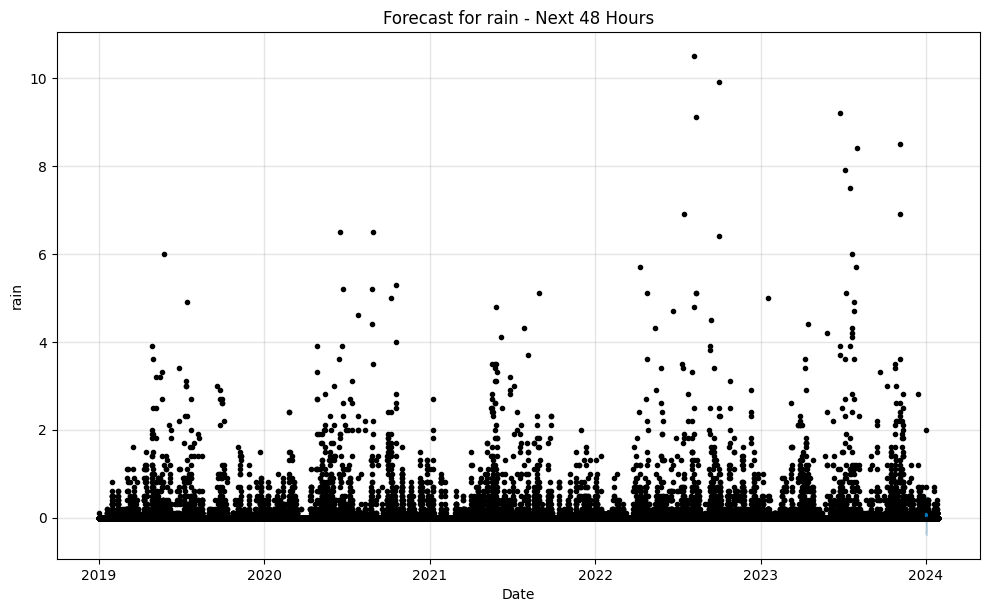

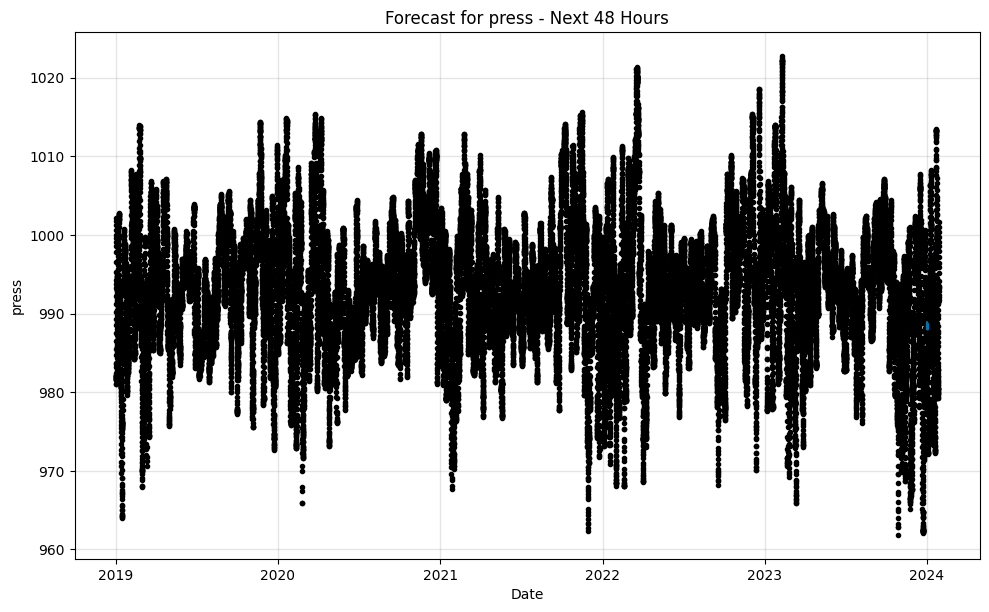

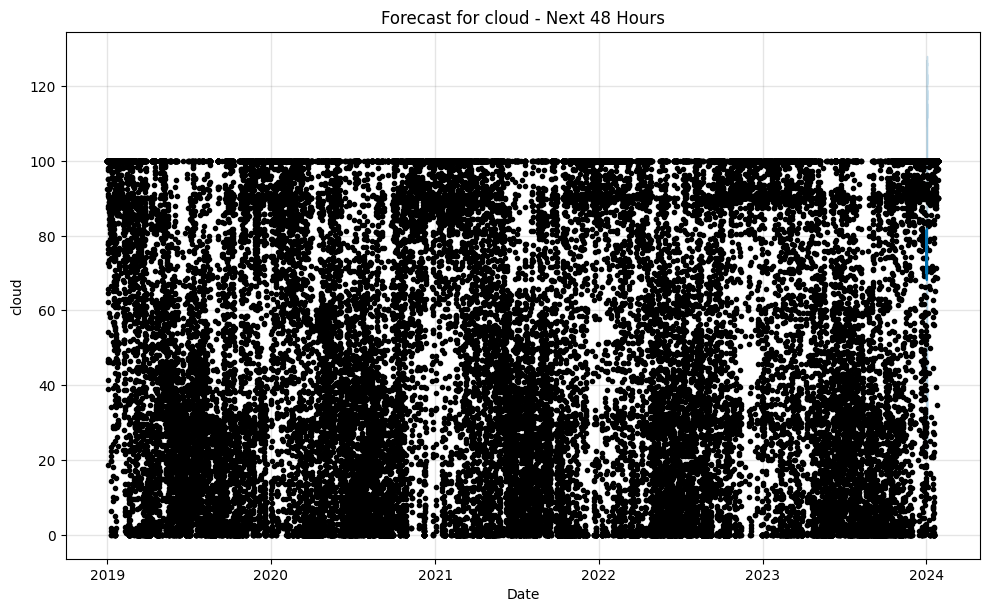

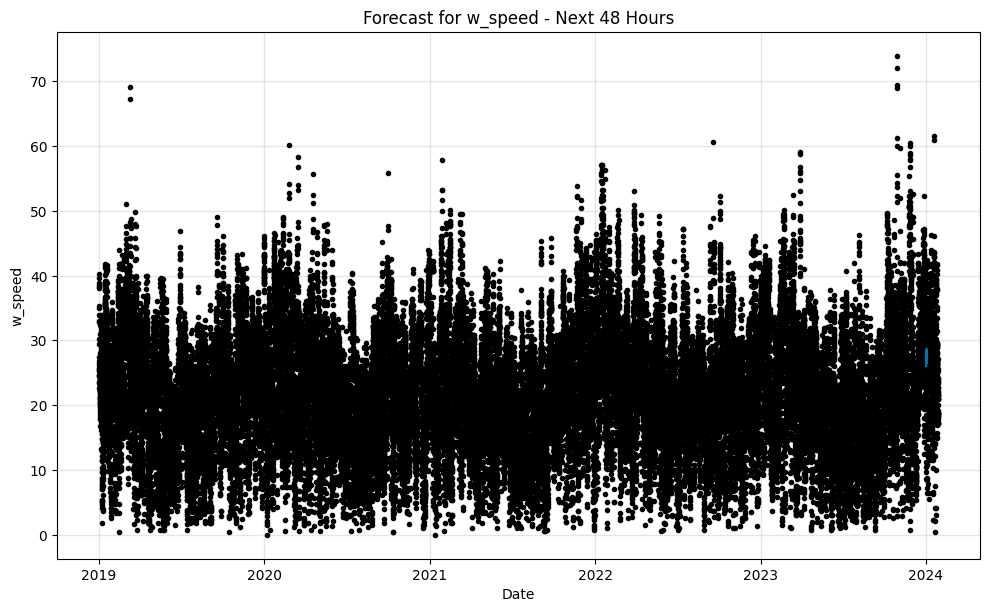

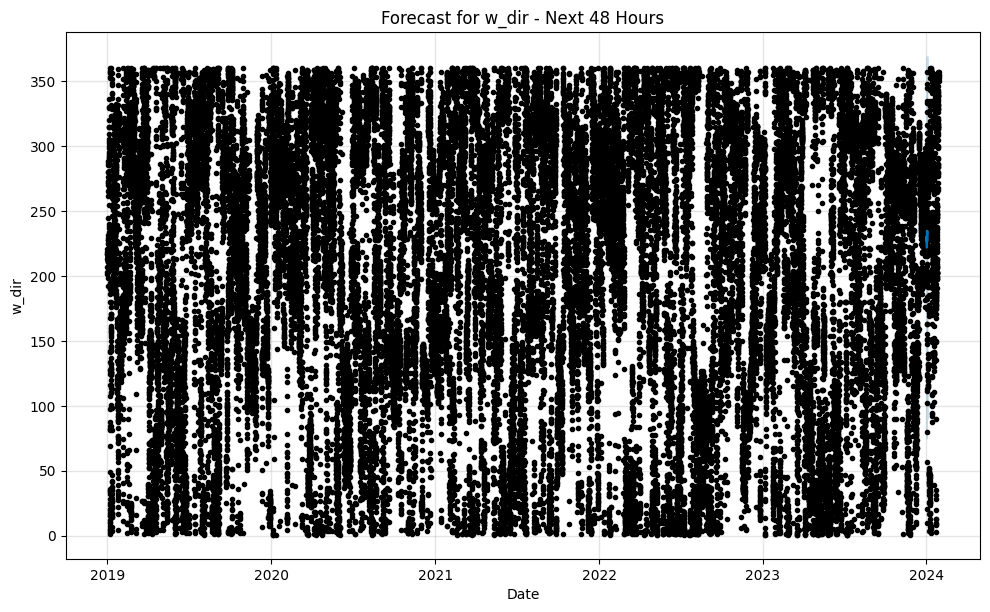

In [18]:
import matplotlib.pyplot as plt

for variable, model_forecast in forecast_data.items():
    fig = loaded_models[variable].plot(model_forecast)
    plt.title(f'Forecast for {variable} - Next 48 Hours')
    plt.xlabel('Date')
    plt.ylabel(variable)
    plt.show()

In [39]:
result_df = pd.DataFrame({'ds': pd.date_range(start='2024-01-01', periods=48, freq='h')})
variables = ['temp_2', 'hum_2', 'temp_a', 'precip', 'rain', 'press', 'cloud', 'w_speed', 'w_dir']

# Create an empty DataFrame with 'ds' column
combined_df = pd.DataFrame({'ds': result_df['ds']})

# Add 'yhat' columns for each variable/model
for variable in variables:
    result = loaded_models[variable].predict(result_df)
    combined_df[variable] = result['yhat']

combined_df.head(5)

,ds,temp_2,hum_2,temp_a,precip,rain,press,cloud,w_speed,w_dir
0,2024-01-01 00:00:00,-2.682668,93.027472,-7.227814,0.084008,0.043236,988.317460,70.155694,27.708469,229.636093
1,2024-01-01 01:00:00,-2.951220,94.171683,-7.525504,0.083187,0.041692,988.271299,70.914706,27.860397,230.523174
2,2024-01-01 02:00:00,-3.144696,94.914041,-7.738486,0.079917,0.037313,988.223109,71.798199,28.015751,230.410361
3,2024-01-01 03:00:00,-3.140886,94.850529,-7.740099,0.078052,0.033951,988.215777,72.455056,27.957364,229.903420
4,2024-01-01 04:00:00,-2.810265,93.538127,-7.418014,0.079344,0.033924,988.296010,72.775456,27.559252,229.385029
